##  ***The Sparks Foundation - Data Science and Business Analytics Internship***

### ***Task no. 1 - Prediction using supervised Machine Learning***

#### *Problem Statement - Predict the percentage of an student based on the no. of study hours.*

#### Objective - What should be the predicted score if student studies for 9.5 hours/day?

##### By - Vaibhav Saraf

### Step no. 1. Importing the Data -
In this step, we will import all the required libraries and required dataset

In [1]:
#Importing all required important libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
#Importing the data from remote -
url = "http://bit.ly/w-data"
data = pd.read_csv(url) #Read the dataset in a variable (here it is "data")

In [3]:
#View the data 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#For getting the information regarding rows and colunms 
data.shape

(25, 2)

In [6]:
#For more information about the given data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#For Statical Summary of the given data 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Check for any missing value in the given data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

###  Step 2. Data Visualization - 

In this step, we visualize the given dataset and try to see if their any direct corelation exist between the two variables or not.

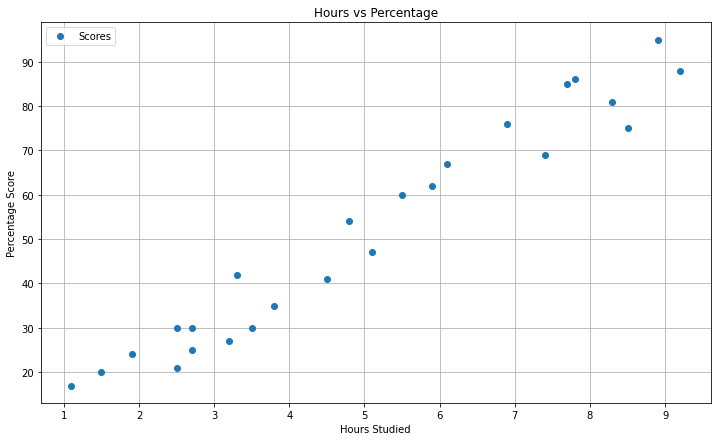

In [9]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"]=[12,7]
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. So, we can use the linear regression supervised machine learning model on it to predict the further values.*

In [10]:
#We can also see corelation between the variables using corr()
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step no. 3 **Preparing the data**

The next step is to divide the data into Train and Test data.

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

The next step is to split this data into training and test sets. This can be done by using Scikit-Learn's built-in train_test_split() method:

In [14]:
#Split the dataset into train and test data within 70:30 Ratio
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Step no. 4 **Training the Model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [15]:
#Trained the Model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

### Step no. 5 **Visualize The Model**

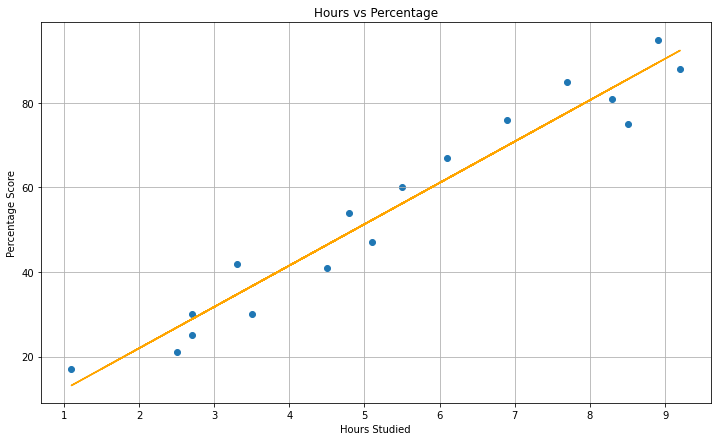

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the trained data
plt.rcParams["figure.figsize"]=[12,7]
plt.scatter(X_train, y_train)
plt.plot(X, line, color='Orange');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

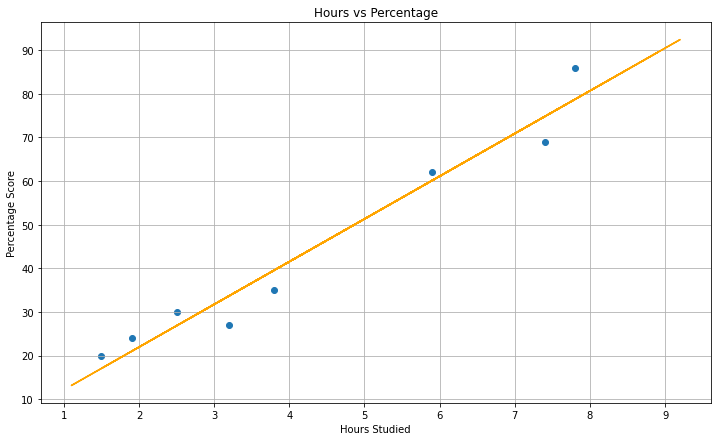

In [17]:
# Plotting for the test data
plt.rcParams["figure.figsize"]=[12,7]
plt.scatter(X_test, y_test)
plt.plot(X, line, color='Orange');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### Step no. 6 **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
#Test the Model
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("the predicted score if student studies for", hours, "hours/day is", own_pred[0])

the predicted score if student studies for 9.25 hours/day is 92.91505723477056


### Step no. 7 **Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and mean Absolute error.

In [24]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Squared Error: 22.96509721270044
Mean Absolute Error: 4.4197278080276545


***Task no. 1, Completed.
Thanks!***